In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
training = pd.read_csv('Datos iniciales/test.csv')

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              325 non-null    object
 1   Model Name                325 non-null    object
 2   Category                  325 non-null    object
 3   Screen Size               325 non-null    object
 4   Screen                    325 non-null    object
 5   CPU                       325 non-null    object
 6   RAM                       325 non-null    object
 7    Storage                  325 non-null    object
 8   GPU                       325 non-null    object
 9   Operating System          325 non-null    object
 10  Operating System Version  291 non-null    object
 11  Weight                    325 non-null    object
dtypes: object(12)
memory usage: 30.6+ KB


In [4]:
training.head() #Overview of dataframe

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg


In [5]:
training.value_counts() #How many diferent categories per column. Some I can convert to numeric. Some I can group into categories. Some (Windows) may not be relevant at all.

Manufacturer  Model Name                                   Category            Screen Size  Screen                                         CPU                                   RAM    Storage                 GPU                             Operating System  Operating System Version  Weight 
Lenovo        IdeaPad Y700-15ISK                           Notebook            15.6"        IPS Panel Full HD 1920x1080                    Intel Core i7 6700HQ 2.6GHz           8GB   1TB HDD                  Nvidia GeForce GTX 960M         Windows           10                        2.6kg      3
              IdeaPad 100S-14IBR                           Notebook            14.0"        1366x768                                       Intel Celeron Dual Core N3050 1.6GHz  2GB   64GB Flash Storage       Intel HD Graphics               Windows           10                        1.5kg      3
Asus          X553SA-XX031T (N3050/4GB/500GB/W10)          Notebook            15.6"        1366x768              

In [6]:
print (training.Manufacturer.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Manufacturer.value_counts()))


Manufacturer
HP         95
Lenovo     71
Dell       65
Asus       35
Acer       20
MSI        20
Toshiba     9
Apple       4
Vero        2
Razer       2
Fujitsu     1
Samsung     1
Name: count, dtype: int64 
 
 Number of categories:  12


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
Manuf_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['ManufacturerLabel'] = Manuf_encoder.fit_transform(training['Manufacturer']) + 1

training['ManufacturerLabel'].head()


0     6
1     3
2     4
3    11
4     7
Name: ManufacturerLabel, dtype: int64

In [8]:
print (training['Model Name'].value_counts(), 
'\n', '\n', 'Number of categories: ', len(training['Model Name'].value_counts()))


Model Name
Inspiron 3567                                  9
XPS 13                                         8
EliteBook 840                                  7
ProBook 450                                    6
Inspiron 5567                                  6
IdeaPad Y700-15ISK                             6
Inspiron 3552                                  6
EliteBook 820                                  5
Spectre Pro                                    5
EliteBook 1040                                 4
ProBook 440                                    4
EliteBook 850                                  4
Vostro 3568                                    4
ThinkPad X1                                    4
Legion Y520-15IKBN                             4
IdeaPad 310-15ISK                              3
250 G5                                         3
250 G6                                         3
X553SA-XX031T (N3050/4GB/500GB/W10)            3
MacBook 12"                                    3
Yoga Book

In [9]:
print (training.Category.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Category.value_counts()))


Category
Notebook              178
Gaming                 55
Ultrabook              44
2 in 1 Convertible     35
Netbook                 8
Workstation             5
Name: count, dtype: int64 
 
 Number of categories:  6


In [10]:
# Create a LabelEncoder object
Category_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['CategoryLabel'] = Category_encoder.fit_transform(training['Category']) + 1

training['CategoryLabel'].head()

training.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,ManufacturerLabel,CategoryLabel
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,6,4
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,3,2
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,4,1
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,11,4
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,7,4


In [11]:
print (training['Screen Size'].value_counts(), 
'\n', '\n', 'Number of categories: ', len(training['Screen Size'].value_counts()))


Screen Size
15.6"    170
14.0"     51
13.3"     41
17.3"     33
12.5"     16
11.6"      6
12.0"      3
10.1"      3
12.3"      1
15.0"      1
Name: count, dtype: int64 
 
 Number of categories:  10


In [12]:
print (training.Screen.value_counts(), #Dont convert
'\n', '\n', 'Number of categories: ', len(training.Screen.value_counts()))

Screen
Full HD 1920x1080                                110
1366x768                                         101
IPS Panel Full HD 1920x1080                       49
IPS Panel Full HD / Touchscreen 1920x1080         18
Full HD / Touchscreen 1920x1080                    9
Quad HD+ / Touchscreen 3200x1800                   7
IPS Panel Touchscreen 2560x1440                    4
1600x900                                           4
IPS Panel Touchscreen 1920x1200                    3
IPS Panel Retina Display 2304x1440                 3
IPS Panel Quad HD+ / Touchscreen 3200x1800         3
4K Ultra HD 3840x2160                              2
IPS Panel 4K Ultra HD 3840x2160                    2
Quad HD+ 3200x1800                                 2
Touchscreen 2560x1440                              2
IPS Panel 2560x1440                                1
Touchscreen / 4K Ultra HD 3840x2160                1
IPS Panel Touchscreen / 4K Ultra HD 3840x2160      1
IPS Panel Touchscreen 2400x1600        

In [13]:
# Create a LabelEncoder object
Screen_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['ScreenLabel'] = Screen_encoder.fit_transform(training['Screen']) + 1

training['ScreenLabel'].head()

training.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,ManufacturerLabel,CategoryLabel,ScreenLabel
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,6,4,1
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,3,2,6
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,4,1,9
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,11,4,6
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,7,4,6


In [14]:
print (training.CPU.value_counts(), #Dont convert
'\n', '\n', 'Number of categories: ', len(training.CPU.value_counts()))

CPU
Intel Core i5 7200U 2.5GHz              39
Intel Core i5 6200U 2.3GHz              36
Intel Core i7 6500U 2.5GHz              33
Intel Core i7 6700HQ 2.6GHz             32
Intel Core i7 7500U 2.7GHz              30
Intel Core i7 7700HQ 2.8GHz             23
Intel Core i3 7100U 2.4GHz              11
Intel Celeron Dual Core N3050 1.6GHz    10
Intel Core i7 6600U 2.6GHz              10
Intel Core i5 6300U 2.4GHz               8
Intel Celeron Dual Core N3060 1.6GHz     8
Intel Core i3 6006U 2GHz                 7
Intel Core i3 6100U 2.3GHz               7
Intel Core i3 6006U 2.0GHz               6
Intel Core i7 6820HK 2.7GHz              4
Intel Pentium Quad Core N3710 1.6GHz     3
Intel Core M 6Y30 0.9GHz                 3
Intel Core i5 6300HQ 2.3GHz              3
Intel Atom x5-Z8550 1.44GHz              3
AMD A9-Series 9410 2.9GHz                3
Intel Core i5 7300HQ 2.5GHz              3
Intel Celeron Dual Core N3350 1.1GHz     3
Intel Celeron Dual Core 3205U 1.5GHz     2
AMD A12

In [15]:
CPU_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['CPULabel'] = CPU_encoder.fit_transform(training['CPU']) + 1

training['CPULabel'].head()

0    41
1    43
2    41
3    27
4     2
Name: CPULabel, dtype: int64

In [16]:
print (training.RAM.value_counts(),
'\n', '\n', 'Number of categories: ', len(training.RAM.value_counts()))

RAM
8GB     136
4GB     104
16GB     50
6GB      17
2GB      12
12GB      4
64GB      1
32GB      1
Name: count, dtype: int64 
 
 Number of categories:  8


In [17]:
print (training[' Storage'].value_counts(), #Dont convert.
'\n', '\n', 'Number of categories: ', len(training[' Storage'].value_counts()))

 Storage
256GB SSD                  94
1TB HDD                    53
500GB HDD                  53
512GB SSD                  27
128GB SSD +  1TB HDD       23
256GB SSD +  1TB HDD       21
128GB SSD                  14
32GB Flash Storage          9
1TB Hybrid                  8
64GB Flash Storage          6
256GB Flash Storage         3
1TB SSD                     3
2TB HDD                     2
16GB Flash Storage          1
512GB SSD +  1TB Hybrid     1
256GB SSD +  500GB HDD      1
1GB SSD                     1
16GB SSD                    1
256GB SSD +  1TB Hybrid     1
512GB SSD +  1TB HDD        1
512GB Flash Storage         1
32GB SSD                    1
Name: count, dtype: int64 
 
 Number of categories:  22


In [18]:
Storage_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['StorageLabel'] = Storage_encoder.fit_transform(training[' Storage']) + 1

training['StorageLabel'].head()

0     6
1    11
2    19
3     1
4    10
Name: StorageLabel, dtype: int64

In [19]:
print (training.Weight.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Weight.value_counts()))

Weight
2.2kg      23
2.4kg      17
2.3kg      16
2.1kg      13
2.04kg     11
1.2kg      10
1.8kg       8
1.5kg       8
1.3kg       7
1.26kg      7
2.6kg       6
1.64kg      6
2.5kg       6
1.54kg      6
1.48kg      6
1.95kg      5
2.18kg      5
2.7kg       5
1.9kg       5
1.86kg      4
2.32kg      4
2.19kg      4
1.91kg      4
1.29kg      4
2.31kg      4
2.09kg      4
2kg         4
1.6kg       4
1.43kg      4
2.20kg      4
1.4kg       4
1.16kg      3
3.78kg      3
2.62kg      3
0.920kg     3
0.69kg      3
1.96kg      3
1.7kg       3
4.6kg       3
1.17kg      3
1.84kg      3
2.36kg      3
1.45kg      2
1.49kg      2
2.24kg      2
2.59kg      2
2.9kg       2
4.3kg       2
1.11kg      2
2.43kg      2
2.65kg      2
3.3kg       2
3.0kg       2
1.47kg      2
2.25kg      2
2.23kg      2
2.08kg      2
1.88kg      2
2.8kg       2
1.23kg      2
4.2kg       1
1.36kg      1
2.07kg      1
1.98kg      1
2.591kg     1
3.31kg      1
2.21kg      1
1.15kg      1
1.75kg      1
2.191kg     1
1.08kg      1

In [20]:
#Por lo que he visto, la GPU es un factor muy importante a la hora de influenciar el precio. Convertir a numérico.
print (training.GPU.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.GPU.value_counts()))

GPU
Intel HD Graphics 520             87
Intel HD Graphics 620             56
Intel HD Graphics                 16
Nvidia GeForce GTX 1060           14
Intel HD Graphics 400             13
Nvidia GeForce GTX 960M           11
Intel HD Graphics 515              9
Nvidia GeForce GTX 1050            9
Nvidia GeForce 940MX               8
AMD Radeon R5 M330                 7
Nvidia GeForce GTX 980M            7
Nvidia GeForce GTX 1050 Ti         6
AMD Radeon R7 M445                 5
AMD Radeon R5 M430                 5
Intel HD Graphics 500              5
Nvidia GeForce GTX 1070            4
Nvidia GeForce 920M                4
AMD Radeon 530                     4
AMD Radeon R7 M440                 4
Nvidia GeForce GTX 970M            4
Nvidia GeForce 930MX               3
AMD Radeon R5                      3
Nvidia Quadro M1000M               2
Intel UHD Graphics 620             2
Intel HD Graphics 405              2
AMD Radeon 520                     2
Nvidia GeForce GTX 950M           

In [21]:
# Create a LabelEncoder object
GPU_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['GPULabel'] = GPU_encoder.fit_transform(training['GPU']) + 1

training['GPULabel'].head()


0    26
1    39
2    26
3    22
4     4
Name: GPULabel, dtype: int64

In [22]:
print (training['Operating System'].value_counts(), #Dont encode OS. Manufacturer has more influence in price than OS.
'\n', '\n', 'Number of categories: ', len(training['Operating System'].value_counts()))

Operating System
Windows      287
No OS         14
Linux         14
Chrome OS      5
Mac OS         4
Android        1
Name: count, dtype: int64 
 
 Number of categories:  6


In [23]:
print (training['Operating System Version'].value_counts(dropna=False), #We can eliminate the OS version as a variable.
'\n', '\n', 'Number of categories: ', len(training['Operating System Version'].value_counts()))

Operating System Version
10     252
7       35
NaN     34
X        4
Name: count, dtype: int64 
 
 Number of categories:  3


In [25]:
import re

def convert_to_numeric(strings):
    result = []
    for string in strings:
        numeric_value = re.findall(r'\d+\.?\d*', string)
        if numeric_value:
            result.append(pd.to_numeric(numeric_value[0]))
    return result

strings = ['24GN', '8"', '12.4kg', '5900']

converted_values = convert_to_numeric(strings)
print(converted_values)

[24, 8, 12.4, 5900]


In [26]:
training = training.rename(columns={'RAM': 'RAM (GB)', 'Screen Size' : 'Screen Size (In.)', 'Weight': 'Weight (Kg)', ' Storage' : 'Storage', 'Price' : 'Price (Sonic Rings)'})
training.head()


,Manufacturer,Model Name,Category,Screen Size (In.),Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,6,4,1,41,6,26
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,3,2,6,43,11,39
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,4,1,9,41,19,26
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,11,4,6,27,1,22
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,7,4,6,2,10,4


In [27]:
training['RAM (GB)'] = convert_to_numeric(training['RAM (GB)'])
training['Screen Size (In.)'] = convert_to_numeric(training['Screen Size (In.)'])
training['Weight (Kg)'] = convert_to_numeric(training['Weight (Kg)'])


In [28]:
training.head()

,Manufacturer,Model Name,Category,Screen Size (In.),Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,6,4,1,41,6,26
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,3,2,6,43,11,39
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,4,1,9,41,19,26
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,11,4,6,27,1,22
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows,10,2.20,7,4,6,2,10,4


In [29]:
Numericals = training._get_numeric_data()
Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,15.6,6,2.04,6,4,1,41,6,26
1,17.3,16,2.99,3,2,6,43,11,39
2,15.6,12,2.19,4,1,9,41,19,26
3,13.3,4,1.20,11,4,6,27,1,22
4,15.6,6,2.20,7,4,6,2,10,4


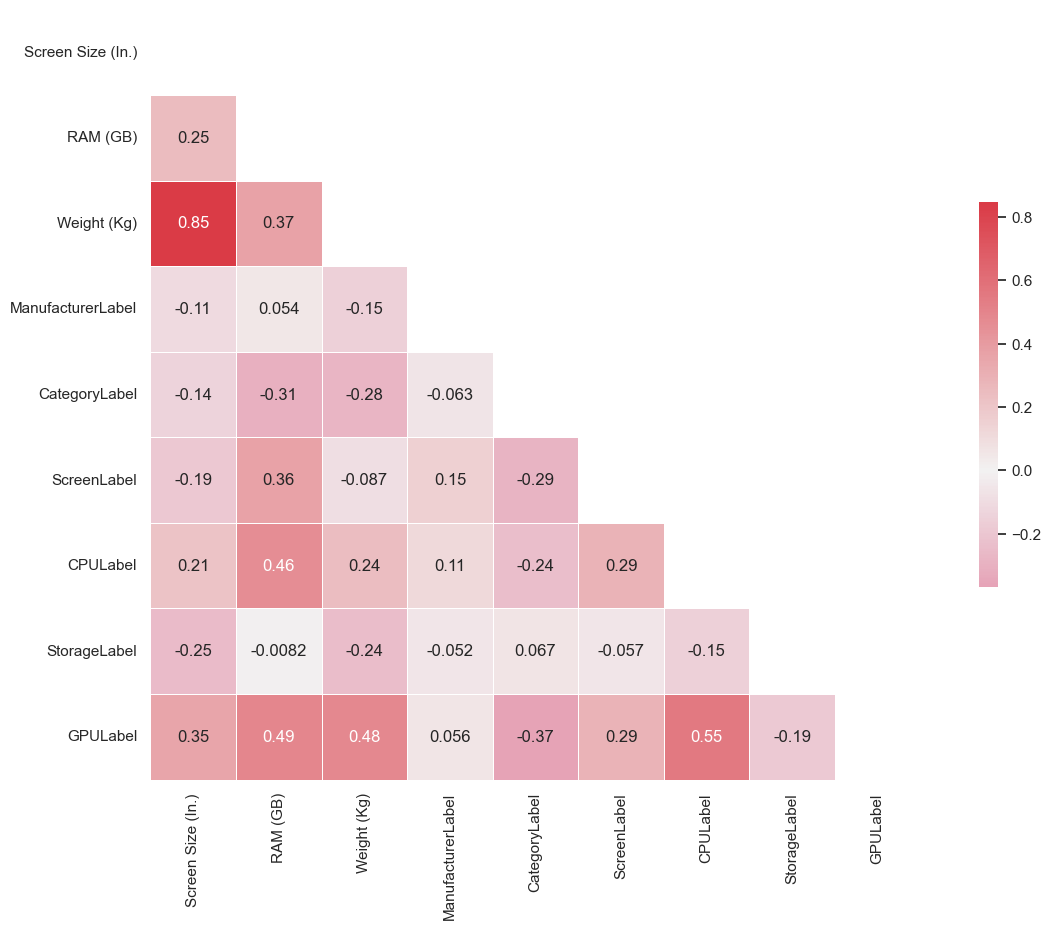

In [30]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [31]:
Removal= ['CategoryLabel']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),ManufacturerLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,15.6,6,2.04,6,1,41,6,26
1,17.3,16,2.99,3,6,43,11,39
2,15.6,12,2.19,4,9,41,19,26
3,13.3,4,1.20,11,6,27,1,22
4,15.6,6,2.20,7,6,2,10,4


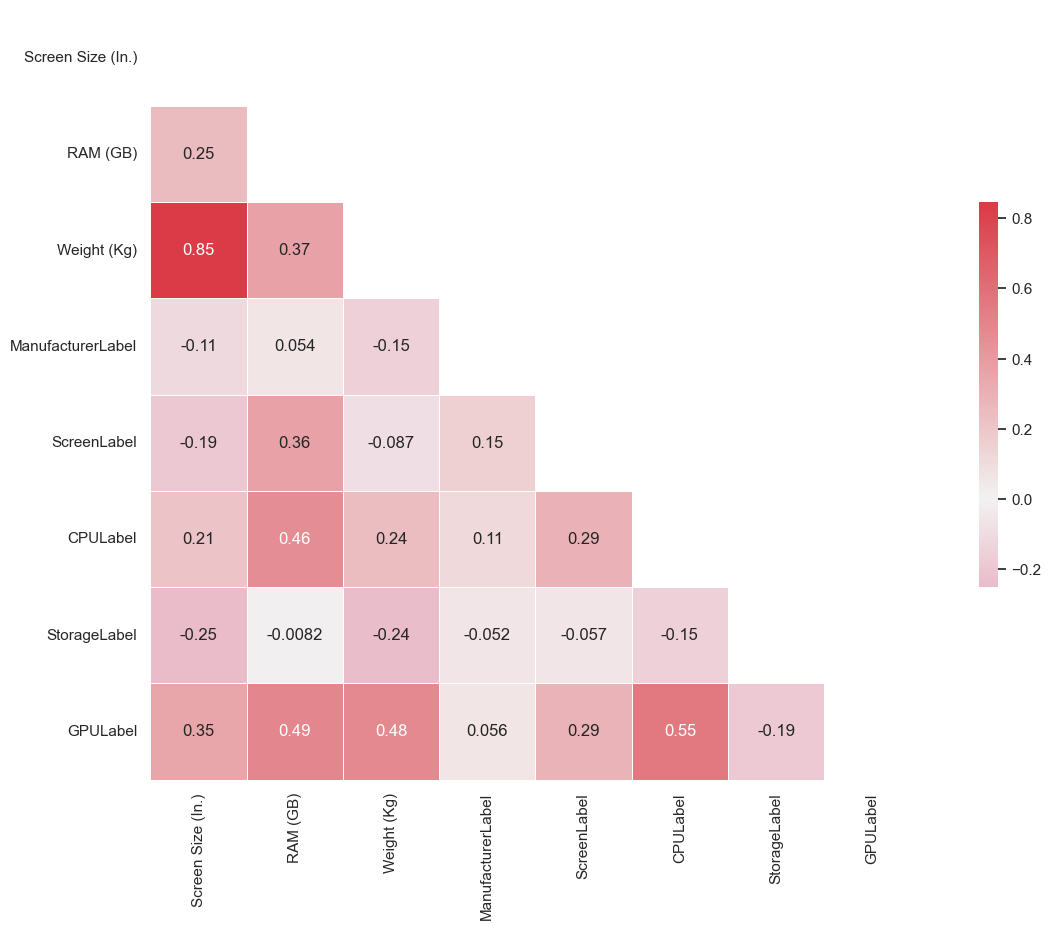

In [32]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [33]:
Removal= ['ManufacturerLabel']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),ScreenLabel,CPULabel,StorageLabel,GPULabel
0,15.6,6,2.04,1,41,6,26
1,17.3,16,2.99,6,43,11,39
2,15.6,12,2.19,9,41,19,26
3,13.3,4,1.20,6,27,1,22
4,15.6,6,2.20,6,2,10,4


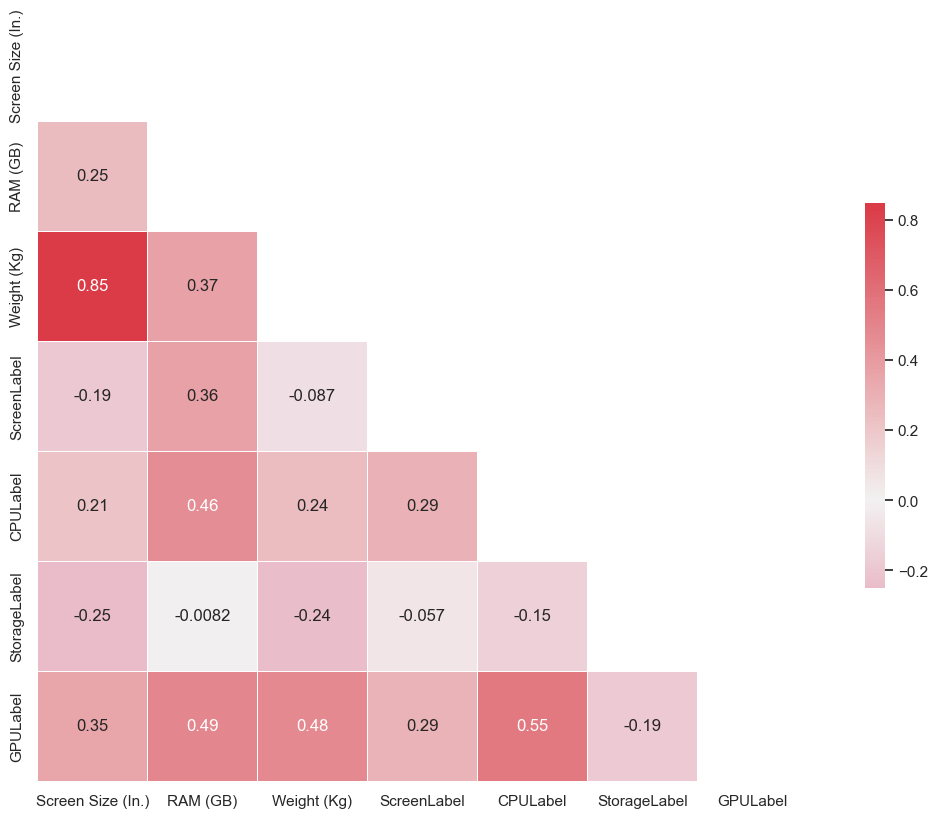

In [34]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [35]:
Removal= ['ScreenLabel']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),CPULabel,StorageLabel,GPULabel
0,15.6,6,2.04,41,6,26
1,17.3,16,2.99,43,11,39
2,15.6,12,2.19,41,19,26
3,13.3,4,1.20,27,1,22
4,15.6,6,2.20,2,10,4


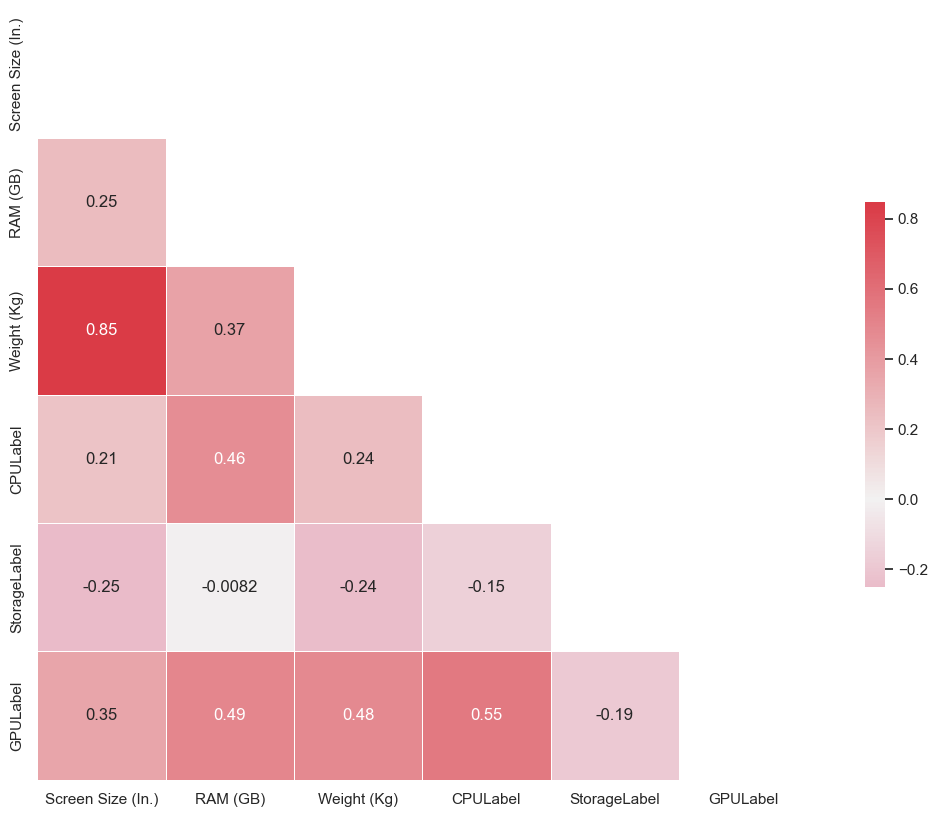

In [36]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [37]:
Removal= ['Screen Size (In.)']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,RAM (GB),Weight (Kg),CPULabel,StorageLabel,GPULabel
0,6,2.04,41,6,26
1,16,2.99,43,11,39
2,12,2.19,41,19,26
3,4,1.20,27,1,22
4,6,2.20,2,10,4


In [38]:
Removal= ['Weight (Kg)']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,RAM (GB),CPULabel,StorageLabel,GPULabel
0,6,41,6,26
1,16,43,11,39
2,12,41,19,26
3,4,27,1,22
4,6,2,10,4


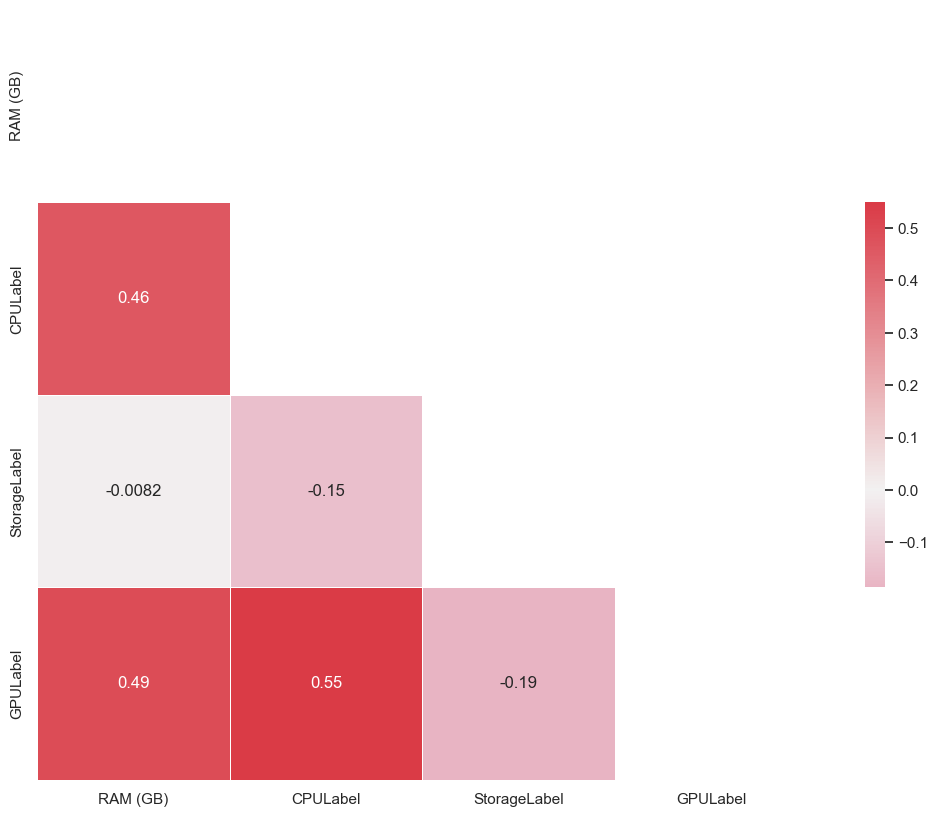

In [39]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [40]:
training.head()

,Manufacturer,Model Name,Category,Screen Size (In.),Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6,1TB HDD,Intel HD Graphics 620,Windows,10,2.04,6,4,1,41,6,26
1,Asus,Rog GL753VE-DS74,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99,3,2,6,43,11,39
2,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows,10,2.19,4,1,9,41,19,26
3,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows,7,1.20,11,4,6,27,1,22
4,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows,10,2.20,7,4,6,2,10,4


In [43]:
dropped_cols=['Manufacturer', 'Model Name', 'CPU', 'Storage', 'GPU', 'Category', 'Screen', 'Operating System', 'Operating System Version']

Filtered_test2= training.drop(columns=dropped_cols)



Filtered_test2 = Filtered_test2.rename(columns={'RAM': 'RAM (GB)', 'Screen Size' : 'Screen Size (In.)', 'Weight': 'Weight (Kg)'})
Filtered_test2.head()


,Screen Size (In.),RAM (GB),Weight (Kg),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,15.6,6,2.04,6,4,1,41,6,26
1,17.3,16,2.99,3,2,6,43,11,39
2,15.6,12,2.19,4,1,9,41,19,26
3,13.3,4,1.20,11,4,6,27,1,22
4,15.6,6,2.20,7,4,6,2,10,4


In [45]:
Filtered_test2.to_csv('TestFiltra2.csv', index=False)